# <font style="color:rgb(50,120,229)">Application: Sunglass Filter </font>

In this section, we will create a simple and fun application using some of the topics we have learned so far.

We will put a sunglass on the face of Elon Musk and make him look cool ( as if he doesn't look so already! ).

![](https://www.dropbox.com/s/4w87z3mkr75lpa0/musk_with_sunglass.png?dl=1)

In [2]:
# import libraries
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#change the default rc (runtime configuration) settings
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## <font style="color:rgb(50,120,229)">Load the Face and sunglass Images </font>
First of all, we will need the two images:
1. Image of Elon Musk we have been using throughout
1. A png image of a sunglass with an alpha channel

Let us load the images and have a look at them.

Text(0.5, 1.0, 'Face')

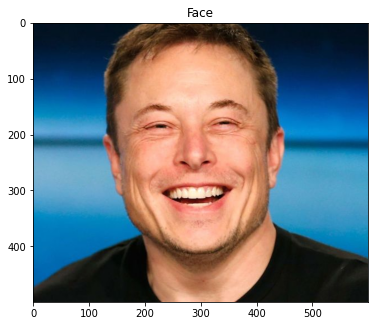

In [4]:
faceImagePath = "data/images/musk.jpg"
faceImage = cv2.imread(faceImagePath)

plt.imshow(faceImage[...,::-1]); plt.title('Face')

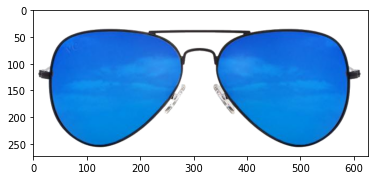

In [15]:
#Load the sunglass image with Alpha channel
# (http://pluspng.com/sunglass-png-1104.html)
glassimagePath = "data/images/sunglass.png"
glassPNG = cv2.imread(glassimagePath, -1)
#Since alpha has 4 layers, we cannot use [...,::-1] to directly convert image to RGB; we have to use cv2.cvtColor()
glassPNG_RGB = cv2.cvtColor(glassPNG, cv2.COLOR_BGR2RGB)
plt.imshow(glassPNG_RGB)

In [10]:
# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(300,100))
print('image Dimension = {}'.format(glassPNG.shape))

image Dimension = (100, 300, 4)


Text(0.5, 1.0, 'Sunglass Alpha channel')

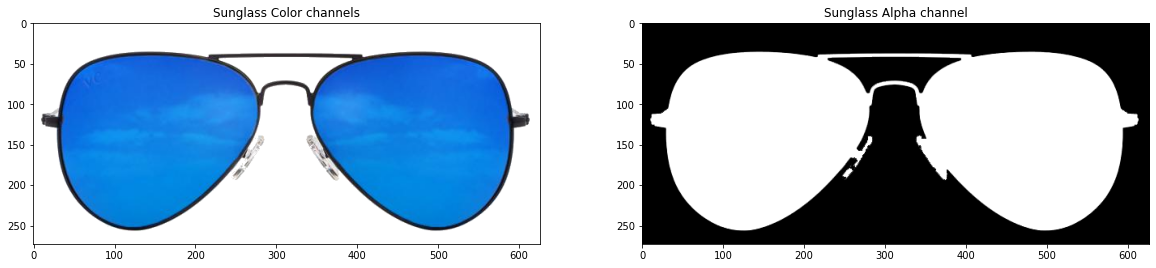

In [16]:
# Separate the Color and Alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

# Display the image for clarity
plt.figure(figsize=[20,15])
plt.subplot(121);plt.imshow(glassBGR[...,::-1]), plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1, cmap='gray');plt.title('Sunglass Alpha channel')

## <font style="color:rgb(50,120,229)">Find the eye region </font>
From the face image, we can see that the eye region lies approximately from row #150 to row #250 and col #140 to col #440. Thus, this will be region where the sunglass is to be placed.

## <font style="color:rgb(50,120,229)">Using Naive Replace</font>
The easiest way that might have come to your mind would be to just replace the eye region with that of the sunglass. Let us give it a try.